# Homework 3 - Angel Anqi Wang

For this homework, you are a data scientist working for Pronto (before the end of their contract with the City of Seattle). Your job is to assist in determining how to do end-of-day adjustments in the number of bikes at stations so that all stations will have enough bikes for the next day of operation (as estimated by the weekday average for the station for the year). Your assistance will help in constructing a plan for each day of the week that specifies how many bikes should be moved from each station and how many bikes must be delievered to each station.

Your assignment is to construct plots of the differences between 'from' and 'to' counts for each station by day of the week. Do this as a set of 7 subplots. You should use at least one function to construct your plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# The following ensures that the plots are in the notebook
%matplotlib inline
# We'll also use capabilities in numpy
import numpy as np
import calendar

In [2]:
df = pd.read_csv("2015_trip_data.csv")

## Create a dataframe with station counts averages by day-of-week

In [3]:
start_day = [pd.to_datetime(time).dayofweek for time in df.starttime]
stop_day = [pd.to_datetime(time).dayofweek for time in df.stoptime]

In [4]:
df['startday'] = start_day  # Creates a new column named 'startday'
df['stopday'] = stop_day
groupby_day_from = df.groupby(['from_station_id','startday']).size()
groupby_day_to = df.groupby(['to_station_id','stopday']).size()
from_means = groupby_day_from.groupby(level=[0]).mean()  # Computes the mean of counts by day
to_means = groupby_day_to.groupby(level=[0]).mean()  # Computes the mean of counts by day

In [5]:
df_day_counts = pd.DataFrame({'From_mean': groupby_day_from, 'To_mean': groupby_day_to}).unstack()
df_day_counts.head()


From_mean                                            To_mean         \
               0      1      2      3      4       5      6       0      1   
BT-01      806.0  724.0  679.0  801.0  921.0  1148.0  806.0   791.0  675.0   
BT-03      577.0  594.0  620.0  606.0  657.0   597.0  548.0   534.0  513.0   
BT-04      387.0  351.0  342.0  370.0  343.0   222.0  206.0   328.0  292.0   
BT-05      500.0  491.0  462.0  496.0  516.0   505.0  398.0   507.0  501.0   
CBD-03     467.0  453.0  443.0  476.0  465.0   309.0  361.0   623.0  596.0   

                                            
            2      3      4       5      6  
BT-01   696.0  791.0  853.0  1141.0  853.0  
BT-03   525.0  449.0  471.0   429.0  465.0  
BT-04   298.0  287.0  276.0   202.0  173.0  
BT-05   489.0  550.0  498.0   504.0  410.0  
CBD-03  617.0  610.0  639.0   448.0  426.0

## Structure the 7 day-of-week plots as subplots

In [6]:
def week_plot(data, column, opts):
    n_groups = len(data.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot
    bar_width = 0.35  # Width of the bars
    opacity = 0.6  # How transparent the bars are

    #VVVV Changed to do two plots with error bars
    rects1 = plt.bar(index, data.From_mean[column], bar_width,
                     alpha=opacity,
                     color='b',
                     label='From',          
                    )
    rects2 = plt.bar(index + bar_width, data.To_mean[column], bar_width,
                     alpha=opacity,
                     color='r',
                     label='To'
                    ) 
    if 'xlabel' in opts:
        plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts:
        plt.ylabel(opts['ylabel'])
    if 'xticks' in opts and opts['xticks']:
        plt.xticks(index + bar_width / 2, data.index)
        _, labels = plt.xticks()  # Get the new labels of the plot
        plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    else:
        labels = ['' for x in data.index]
        plt.xticks(index, labels)
    if 'ylim' in opts:
        plt.ylim(opts['ylim'])
    if 'title' in opts and opts['title'] == True:
        plt.title(calendar.day_name[column])
    if 'legend' in opts and opts['legend'] == True:
        plt.legend()

In [10]:
def plot_barN(df, columns, opts, fig):
    fig = plt.figure(figsize=fig)
    num_columns = len(columns)
    local_opts = dict(opts)  # Make a deep copy of the object
    idx = 0
    for column in columns:
        idx += 1
        plt.subplot(4,2,idx)
        
        if 'title' in local_opts:
            plt.title(calendar.day_name[column])
        local_opts['xticks'] = False
        local_opts['xlabel'] = ''
        local_opts['ylabel'] = ''
        if idx == num_columns or idx == num_columns - 1:
            if 'xticks' in opts and opts['xticks'] == True:
                local_opts['xticks'] = True
            if 'xlabel' in opts:
                local_opts['xlabel'] = opts['xlabel']
        if 'ylabel' in opts and idx % 2 == 1:
                local_opts['ylabel'] = opts['ylabel']
        week_plot(df_day_counts, column, local_opts)

In [13]:
# Constant variables
in_cols = [0,1,2,3,4,5,6]
fig = (16,24)

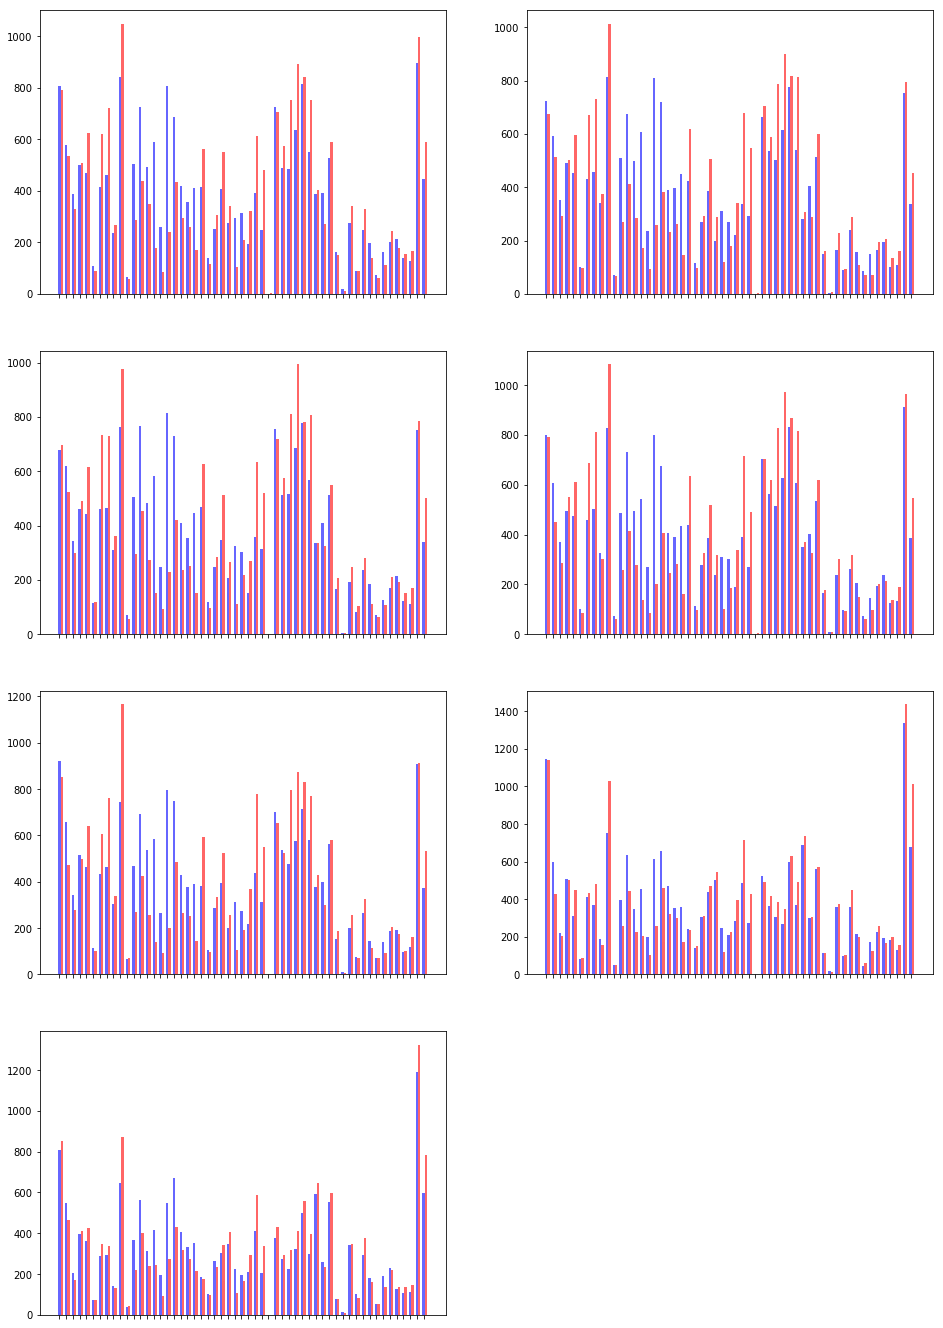

In [12]:
# Plot options
opts = {}

plot_barN(df_day_counts, in_cols, opts, fig)

## Label the plots by day-of-week

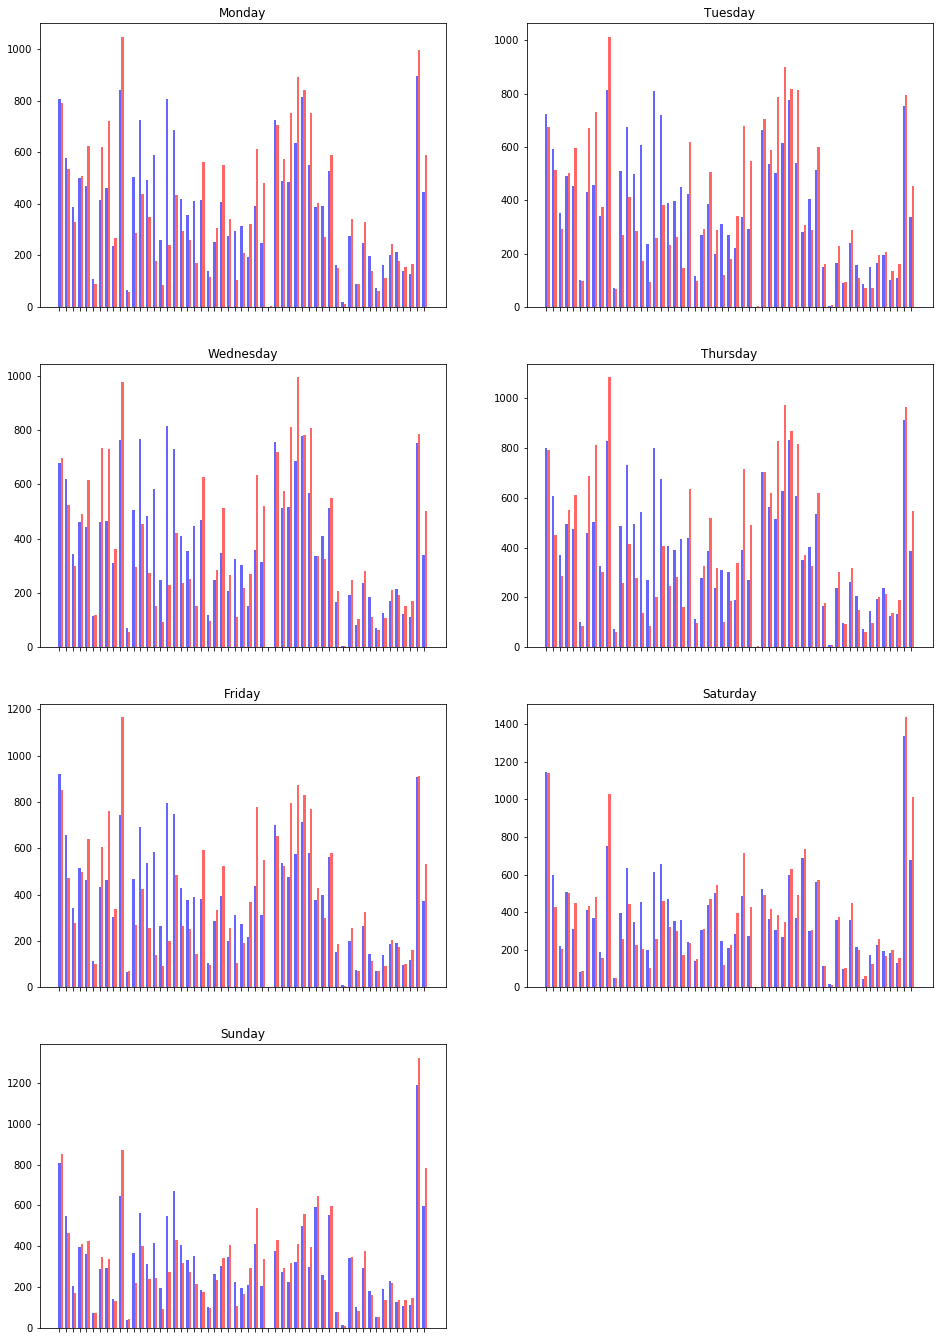

In [14]:
# Plot options
#opts = {'title' : True, 'xlabel': 'Stations', 'ylabel': 'Counts', 'legend': True}
opts = {'title': True}

plot_barN(df_day_counts, in_cols, opts, fig)

## Label the x-axis for plots in the last row and label the y-axis for plots in the left-most column

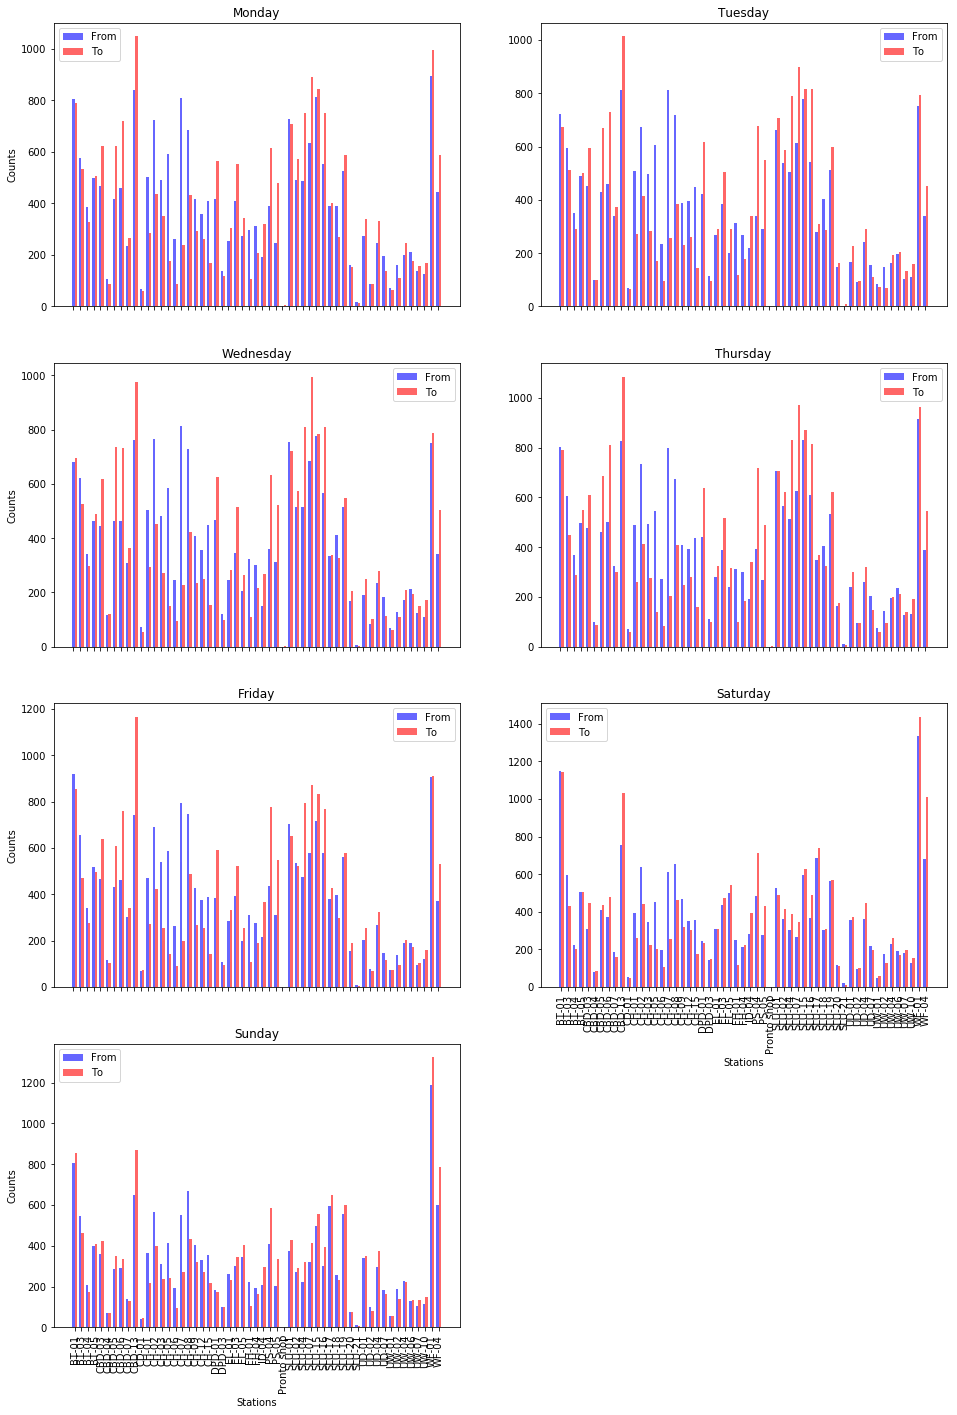

In [16]:
# Plot options
opts = {'title' : True, 'xlabel': 'Stations', 'ylabel': 'Counts', 'legend': True, 'xticks': True}

plot_barN(df_day_counts, in_cols, opts, fig)